## Setup
Please download result data from this [link](https://www.dropbox.com/s/39gvm9lnn180nap/meta_marl_result.zip?dl=0). Then, unzip and put the data in `meta_marl/notebook/data`. 

In [1]:
import seaborn as sns
import pylab as plot
import matplotlib.pyplot as plt
import numpy as np

# Set plotting
sns.set_style("ticks")
sns.set_palette(sns.color_palette("hls", 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'legend.fontsize': 14}
plot.rcParams.update(params)

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

MAX_ITERATION = 20
N_SEED = 20

In [2]:
def read_key_from_log(path, key, index, i_agent=None):
    with open(path) as f:
        content = f.read().splitlines()

    data = []
    for line in content:
        target_data = None
        if key in line:
            if i_agent is not None:
                words = line.split()
                if int(words[-6][0]) == i_agent:
                    target_data = line.split()[index]
            else:
                target_data = line.split()[index]

        if target_data is not None:
            if target_data[0] == "[":
                target_data = target_data[1:-1]
            if target_data[0] == ",":
                target_data = target_data[1:-1]
            if target_data[-1] == ",":
                target_data = target_data[0:-1]
            if "seed" not in target_data:
                data.append(float(target_data))

    assert len(data) > 0

    return data

1 5.0 : (3, 200002) (3, 200001)
1 10.0 : (1, 200002) (1, 200001)
1 25.0 : (2, 200002) (2, 200001)
2 5.0 : (3, 200002) (3, 200001)
2 10.0 : (1, 200002) (1, 200001)
2 25.0 : (2, 200002) (2, 200001)
3 5.0 : (2, 200002) (2, 200001)
3 25.0 : (1, 200002) (1, 200001)
4 5.0 : (2, 200002) (2, 200001)
5 5.0 : (2, 200002) (2, 200001)
6 5.0 : (2, 200002) (2, 200001)


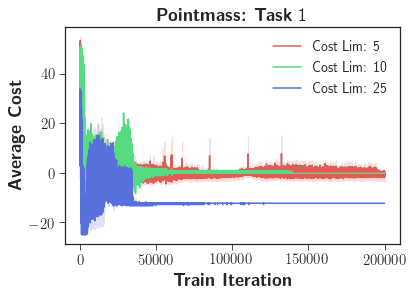

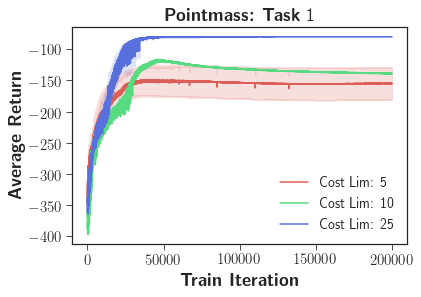

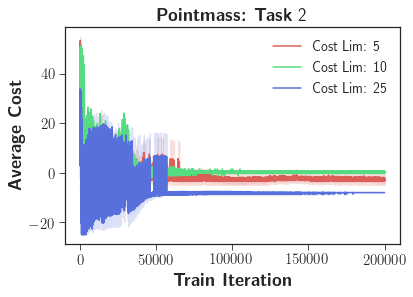

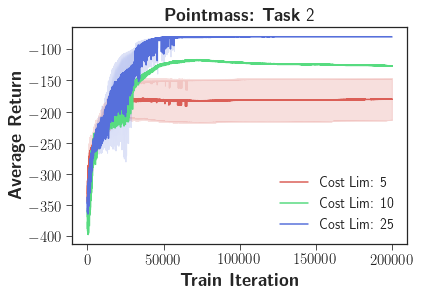

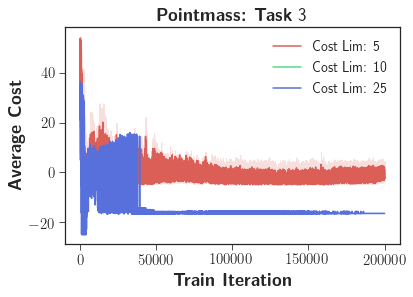

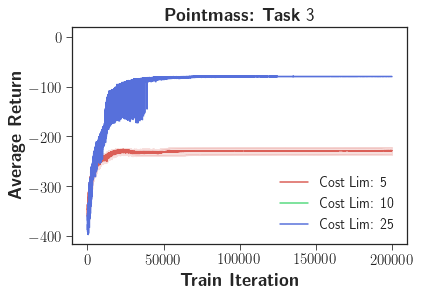

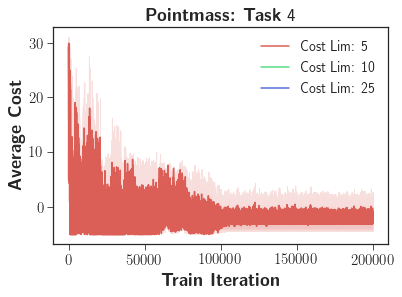

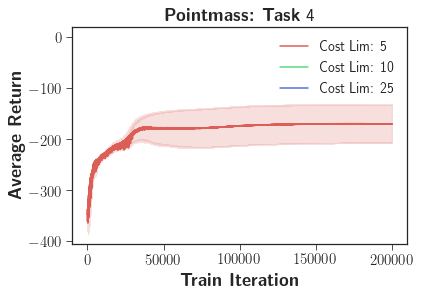

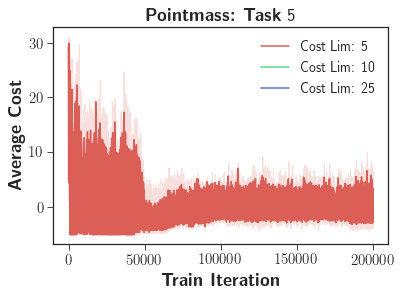

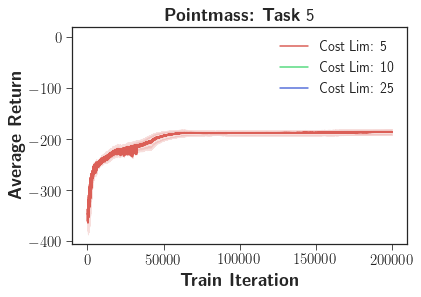

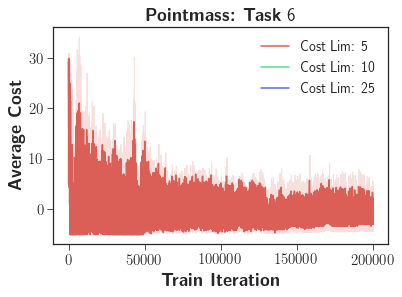

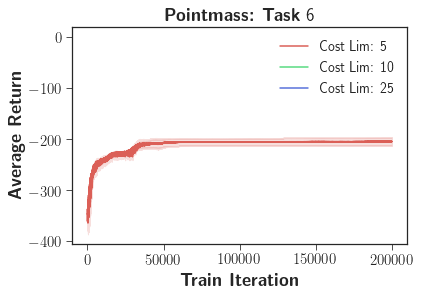

In [3]:
for task in [1, 2, 3, 4, 5, 6]:
    costs, objs = [], []
    for lim in ["5.0", "10.0", "25.0"]:
        cost, obj = [], []
        for seed in range(1, 10):
            path = "./data/pointmass/seed::" + str(seed) + "_algo::cpo_task::" + str(task) + "_cost_lim::" + lim
            try:
                cost_ = read_key_from_log(path, key="cost", index=-1)
                if len(cost_) > 200000:
                    cost.append(np.array(cost_))

                obj_ = read_key_from_log(path, key="return", index=-1)
                if len(obj_) > 200000:    
                    obj.append(np.array(obj_))
            except:
                pass

        if len(cost) == 0:
            cost, obj = np.zeros((1, 1)), np.zeros((1, 1))
        else:
            cost = np.stack(cost, axis=0)
            obj = np.stack(obj, axis=0)
            print(task, lim, ":", cost.shape, obj.shape)
        
        costs.append(cost)
        objs.append(obj)
        
    fig, ax = plt.subplots()
    sns.set_style("ticks")        
    datas = costs
    legends = ["Cost Lim: 5", "Cost Lim: 10", "Cost Lim: 25"]
    colors = [
        sns.color_palette("hls", 8)[0], 
        sns.color_palette("hls", 8)[3], 
        sns.color_palette("hls", 8)[5],
        sns.color_palette("hls", 8)[6]]

    for data, legend, color in zip(datas, legends, colors):
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        confidence = 1.96 * std / float(np.sqrt(10))  # 95% interval
        error = (mean - confidence, mean + confidence)

        ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
        ax.plot(np.arange(mean.shape[0]), mean, label=legend, color=color)      

    plt.xlabel(r'\textbf{Train Iteration}', size=18)
    plt.ylabel(r'\textbf{Average Cost', size=18)
    plt.title(r'\textbf{Pointmass: Task} ' + str(task), size=18)
    plt.legend()        
    
    fig, ax = plt.subplots()
    sns.set_style("ticks")        
    datas = objs
    legends = ["Cost Lim: 5", "Cost Lim: 10", "Cost Lim: 25"]
    colors = [
        sns.color_palette("hls", 8)[0], 
        sns.color_palette("hls", 8)[3], 
        sns.color_palette("hls", 8)[5],
        sns.color_palette("hls", 8)[6]]

    for data, legend, color in zip(datas, legends, colors):
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        confidence = 1.96 * std / float(np.sqrt(10))  # 95% interval
        error = (mean - confidence, mean + confidence)

        ax.fill_between(np.arange(mean.shape[0]), error[0], error[1], alpha=0.2, color=color)
        ax.plot(np.arange(mean.shape[0]), mean, label=legend, color=color)      

    plt.xlabel(r'\textbf{Train Iteration}', size=18)
    plt.ylabel(r'\textbf{Average Return', size=18)
    plt.title(r'\textbf{Pointmass: Task} ' + str(task), size=18)
    plt.legend()     